In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import xgcm

%matplotlib inline

In [2]:
try:
    ds_RG_argo = xr.open_mfdataset('/Volumes/Lagarostrobos/datasets/observations/Argo/roemmich-gilson_climatology/RG_ArgoClim_[0-9]*',
                               decode_times=False, combine='by_coords')

except OSError:
    ds_RG_argo = xr.open_mfdataset("/Users/ewd/Library/CloudStorage/OneDrive-UniversityofTasmania/Ed's Files/Research/datasets/RG_argo/RG_ArgoClim_[0-9]*",
                               decode_times=False, combine='by_coords')
    

In [3]:
ds_RG_argo_2016 = xr.open_mfdataset("/Users/ewd/Library/CloudStorage/OneDrive-UniversityofTasmania/Ed's Files/Research/datasets/RG_argo/RG_ArgoClim_Temp.nc",
                               decode_times=False, combine='by_coords')

In [4]:
ds_RG_argo = xr.merge([ds_RG_argo_2016, ds_RG_argo])

/Users/ewd/anaconda3/envs/py311/lib/python3.11/site-packages/xarray/core/indexing.py:1385: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/Users/ewd/anaconda3/envs/py311/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

In [5]:
ds_RG_argo = ds_RG_argo.chunk('auto')

In [6]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 230)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 0.5 1.5 2.5 ... 227.5 228.5 229.5
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [7]:
datetime_index = []

for i in range(ds_RG_argo['TIME'].shape[0]):
    datetime_index.append(date(2004, 1, 15) + relativedelta(months=np.floor(ds_RG_argo['TIME'][i])))
    
ds_RG_argo = ds_RG_argo.assign_coords({'TIME':pd.to_datetime(datetime_index)})

In [8]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 230)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2023-02-15
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [13]:
ds_RG_argo_monthly_clim = ds_RG_argo.sel(TIME=slice('2004-01-01','2022-12-31')).groupby("TIME.month").mean(dim='TIME')


In [16]:
ds_RG_argo_anom = ds_RG_argo.groupby("TIME.month") - ds_RG_argo_monthly_clim

/Users/ewd/anaconda3/envs/py311/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing with an out-of-order index is generating 20 times more chunks
  return self.array[key]


In [17]:
ds_RG_argo_anom

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 230)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2023-02-15
    month                     (TIME) int64 1 2 3 4 5 6 7 8 ... 8 9 10 11 12 1 2
Data variables:
    ARGO_TEMPERATURE_MEAN     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>

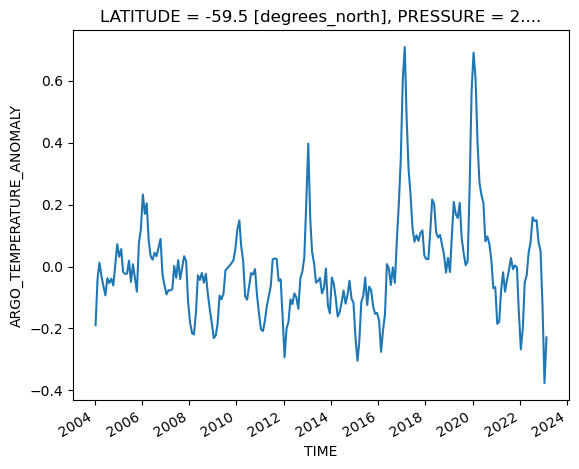

In [18]:
ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(LATITUDE=-60, method='nearest').sel(PRESSURE=0, method='nearest').mean(dim='LONGITUDE').plot()

## Define grid metrics for Argo

In [19]:
# faces of the vertical grid
zf = np.array([ 0, 5, 15., 25., 35., 45., 55., 65., 75., 85., 95., 105.,
               115., 125., 135., 145., 155., 165., 175, 190, 210., 230.,
               250., 270., 290., 310., 330., 350.,370., 390., 410., 430.,
               450, 475, 525., 575., 625., 675., 725., 775., 825., 875.,
               925., 975., 1025., 1075., 1125., 1175., 1225., 1275., 1325.,
               1375, 1450, 1550., 1650., 1750., 1850., 1950, 2000])

In [20]:
# thickness of the vertical grid cells
dzf = zf[1:] - zf[:-1]
print(dzf)
print(dzf.sum())

[  5.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.
  10.  10.  10.  10.  15.  20.  20.  20.  20.  20.  20.  20.  20.  20.
  20.  20.  20.  20.  25.  50.  50.  50.  50.  50.  50.  50.  50.  50.
  50.  50.  50.  50.  50.  50.  50.  50.  50.  75. 100. 100. 100. 100.
 100.  50.]
2000.0


In [21]:
# horizontal grid faces
dyf = ds_RG_argo.LATITUDE*0 + 111111
dxf = ds_RG_argo.LONGITUDE*0 + 111111*np.cos(ds_RG_argo.LATITUDE*np.pi/180) 

In [22]:
metrics = { ('X',): ['dxf'],
            ('Y',): ['dyf'], 
            ('Z',):['dzf']}

In [23]:
ds_RG_argo = ds_RG_argo.assign_coords(dxf=(["LATITUDE", "LONGITUDE"], dxf.data.T),
                                      dyf=("LATITUDE", dyf.data),
                                      dzf=("PRESSURE", dzf))

In [24]:
ds_RG_argo

<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 230)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) datetime64[ns] 2004-01-15 ... 2023-02-15
    dxf                       (LATITUDE, LONGITUDE) float64 4.783e+04 ... 2.0...
    dyf                       (LATITUDE) float64 1.111e+05 ... 1.111e+05
    dzf                       (PRESSURE) float64 5.0 10.0 10.0 ... 100.0 50.0
Data variables:
    ARGO_TEMPERATURE_MEAN     (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
    BATHYMETRY_MASK           (PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(11, 58, 145, 360), meta=np.ndarray>
Attributes:
    history:  FERRET V5.51    9-Jun-15FERRET V5.51   28-Aug-15FERRET V5.51   ...

In [25]:
argo_grid = xgcm.Grid(ds_RG_argo, coords={"X":{"center": "LONGITUDE"},
                                          "Y":{"center": "LATITUDE"},
                                            "Z":{"center": "PRESSURE"}}, metrics=metrics, periodic=['LONGITUDE'])

In [26]:
argo_grid

<xgcm.Grid>
X Axis (not periodic, boundary=None):
  * center   LONGITUDE
Y Axis (not periodic, boundary=None):
  * center   LATITUDE
Z Axis (not periodic, boundary=None):
  * center   PRESSURE

## Depth-time plot of temperature anomaly

In [27]:
lat_range = (-65, -50)
argo_anom_time_series = argo_grid.average(argo_grid.average(
                                ds_RG_argo_anom['ARGO_TEMPERATURE_ANOMALY'].sel(LATITUDE=slice(lat_range[0], lat_range[1])),
                                              'X'),'Y').load()

In [28]:
argo_anom_time_series = argo_anom_time_series.assign_attrs({'Latitude range averaged over': '({0}, {1})'.format(lat_range[0], lat_range[1])})
argo_anom_time_series = argo_anom_time_series.assign_attrs({'Note': 'Monthly climatology subtracted from original monthly anomaly data'})

In [29]:
argo_anom_time_series.to_netcdf('argo_anom_time_series.nc')

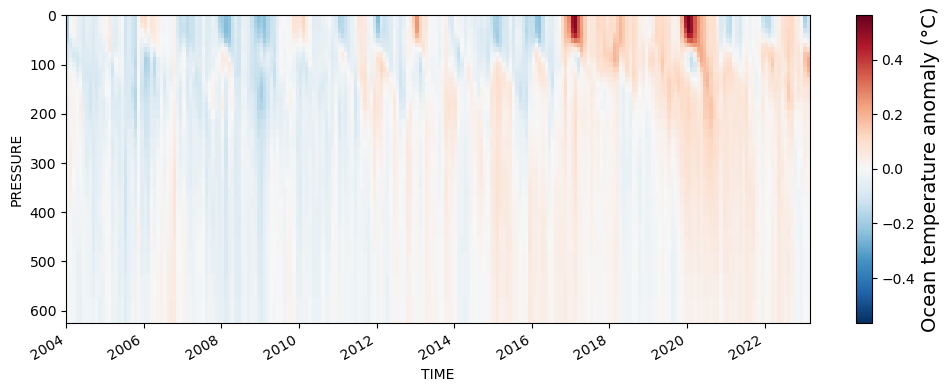

In [30]:
plt.figure(figsize=(12,4))
im = argo_anom_time_series.sel(PRESSURE=slice(0,600)).plot(y='PRESSURE', yincrease=False, add_colorbar=False)
plt
CB = plt.colorbar(im)
CB.ax.set_ylabel('Ocean temperature anomaly (°C)', fontsize=14)
plt.savefig('RG-argo-ocean-temp-anom-50-65S.png', dpi=200, bbox_inches='tight')

## Time plot

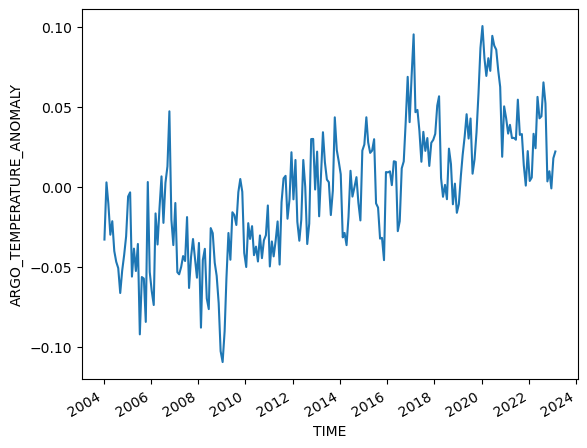

In [31]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(0,600)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-0-600m-depth.png', dpi=200, bbox_inches='tight')

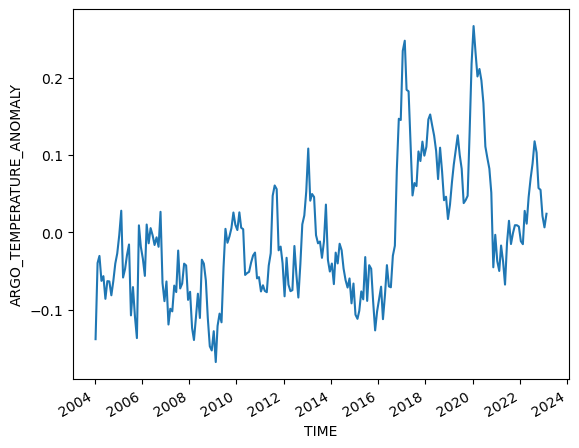

In [32]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(0,100)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-0-100m-depth.png', dpi=200, bbox_inches='tight')

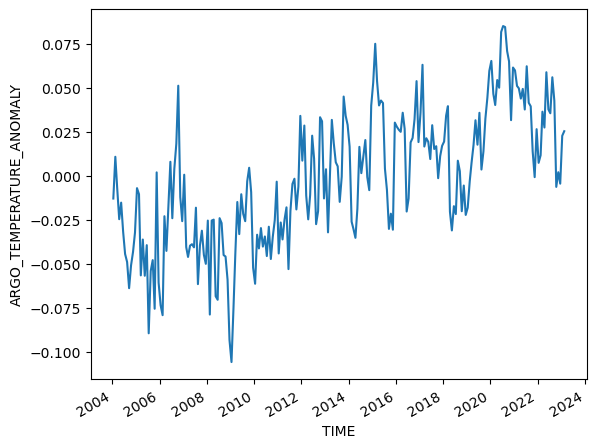

In [33]:
argo_grid.average(argo_anom_time_series.sel(PRESSURE=slice(100,600)), 'Z').plot()
plt.savefig('RG-argo-temp-anom-time-series-100-600m-depth.png', dpi=200, bbox_inches='tight')